One man army: Traktirov Dmitrii

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Будем учиться классифицировать жанры музыки. В отличие от проекта, который вас ждет, здесь мы будем работать не с сырыми данными (аудиодорожками), а уже в осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [293]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [271]:
# общее

data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [450]:
# полезно посмотреть сколько вообще у нас есть классов 

data.Class.value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

In [273]:
# типы переменных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [274]:
# проверяем NA

for col in data.columns:
    print(f'{sum(data[col].isna()):5d} NA values in column {col}')

    0 NA values in column Artist Name
    0 NA values in column Track Name
  428 NA values in column Popularity
    0 NA values in column danceability
    0 NA values in column energy
 2014 NA values in column key
    0 NA values in column loudness
    0 NA values in column mode
    0 NA values in column speechiness
    0 NA values in column acousticness
 4377 NA values in column instrumentalness
    0 NA values in column liveness
    0 NA values in column valence
    0 NA values in column tempo
    0 NA values in column duration_in min/ms
    0 NA values in column time_signature
    0 NA values in column Class


In [294]:
# вроде как деревья умеют справляться с NA, но без них спокойнее

data = data.dropna()

In [171]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:>

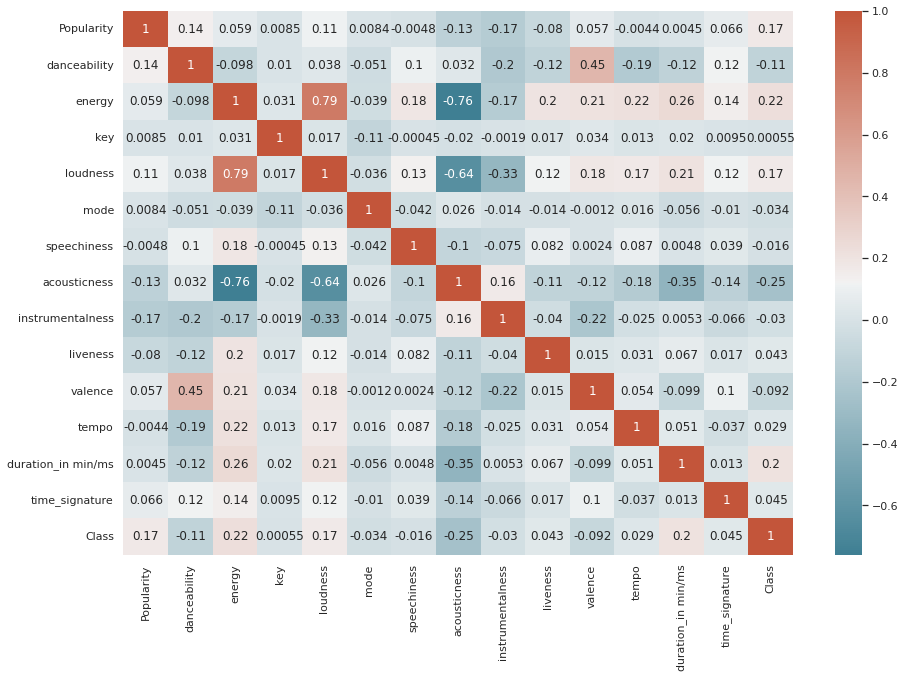

In [172]:
# корреляции признаков

corr = data.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [275]:
# поделим колонки

useless_cols = ['Artist Name', 
                'Track Name',]

num_cols = ['Popularity', 
            'danceability', 
            'energy', 
            'loudness', 
            'speechiness', 
            'acousticness',
            'instrumentalness', 
            'liveness', 
            'valence', 
            'tempo',
            'duration_in min/ms',]

cat_cols = ['key', 
            'mode', 
            'time_signature',]

target_col = ['Class']


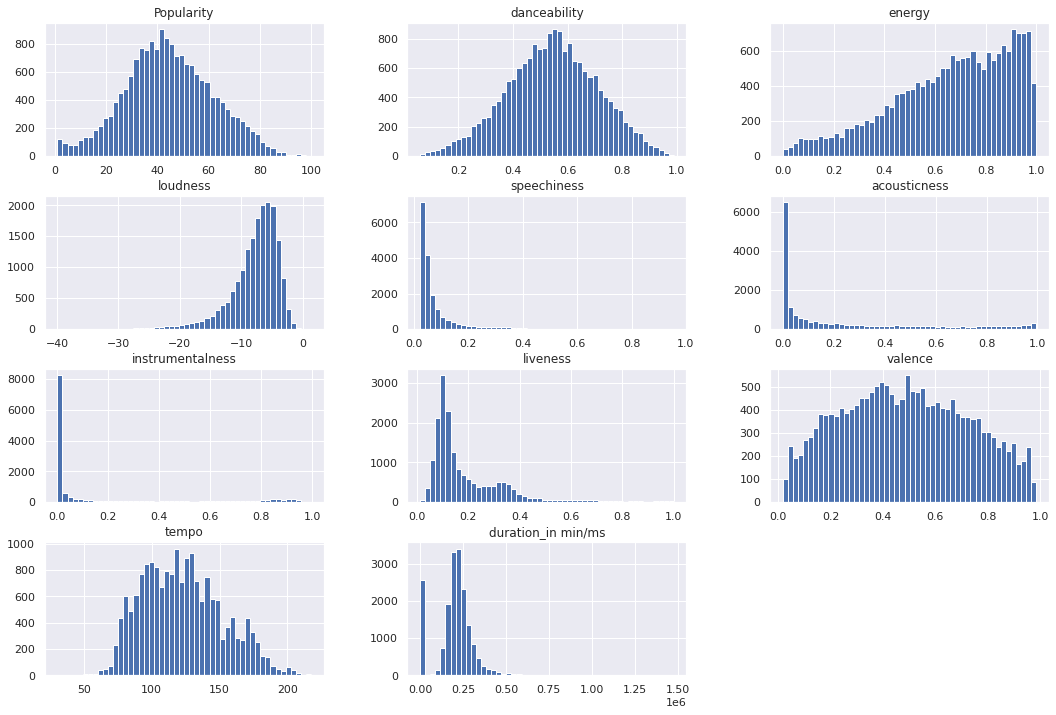

In [276]:
# распределение данных гистограммами для числовых признаков

data.hist(column = num_cols, bins=50, figsize=(18,12))
None

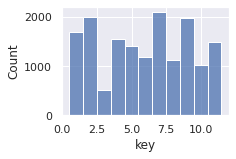

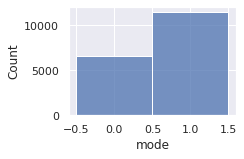

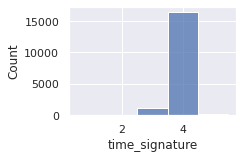

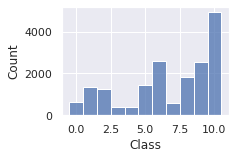

In [277]:
# баланс классовых признаков (и целевой колонки)

sns.set(rc={'figure.figsize':(3, 2)})

for col in cat_cols+target_col:
    sns.histplot(data, x=col, discrete=True)
    plt.show()

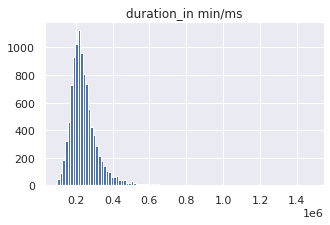

In [316]:
# пик в колонке duration_in min/ms выглядит не слишком красиво
# но по факту у него то же стандартное распределение, так что выкидывать не будем

data.loc[data['duration_in min/ms'] > 0.1e6].hist('duration_in min/ms', bins=100, figsize=(5,3))
None

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

#### 2.0 Борьба с дисбалансом в классах

Считаем веса классов, их мы потом будем передавать в наши классификаторы.

In [425]:
from sklearn.utils.class_weight import compute_class_weight

In [427]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

In [428]:
# отражает дисбаланс классов

class_weights

{0: 2.8258373205741627,
 1: 1.045926800472255,
 2: 1.1472416472416473,
 3: 3.8534145280556764,
 4: 7.255528255528255,
 5: 2.1027771184429147,
 6: 0.5270704426463588,
 7: 2.255920550038197,
 8: 0.7009257061476383,
 9: 0.9773830538393645,
 10: 0.31694751529462273}

#### 2.1 Схлопывание коррелирующих признаков

In [278]:
from sklearn.decomposition import PCA

In [295]:
# параметры loudness, acousticness и energy явно коррелируют
# пожалуй, можно их объединить в один параметр (назовём его hardness)

hardness = data.loc[:,['loudness', 'acousticness', 'energy']].copy()

pca = PCA(n_components = 1)
pca.fit(hardness)
hardness_transformed = pca.transform(hardness)
data['hardness'] = hardness_transformed

In [296]:
# новые колонки будут выглядеть так

num_cols = ['Popularity', 
            'danceability', 
#             'energy',             # drop
#             'loudness',           # drop
            'speechiness', 
#             'acousticness',       # drop
            'instrumentalness', 
            'liveness', 
            'valence', 
            'tempo',
            'duration_in min/ms',
            'hardness',]            # new

#### 2.2 Деление на train/test

In [349]:
import numpy as np

In [350]:
X = data[cat_cols + num_cols]
y = np.array(data[target_col]).reshape(y.shape[0],)

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### 2.3 Поиск лучших параметров модели

In [284]:
from sklearn.model_selection import GridSearchCV

In [429]:
# Cоздаем объект классификатора

DT_model = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

In [430]:
# max_depth -- максимальная глубина дерева
# max_features -- сколько признаков использовать для нахождения лучшего разделения (влияет разве что на время)
# criterion -- функция для измерения качества сплита
# min_samples_split -- минимальное число элементов в узле чтобы продолжить его делить
# min_samples_leaf -- минимальное число элементов в узле чтобы он мог считаться конечным (листом)

grid_param_dt = {
    'max_depth': [None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
#     'DT_model__max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': list(range(1,14,4)),
}

In [431]:
# verbose -- наглядность вывода (10 для вывода инфы о каждой опробованной модели, 1 - не очень наглядно)
# scoring -- метрика для оценки предсказаний на тестовой выборке
# n_jobs -- количество параллельно запущенных процессов. -1 для использования всех процессоров
# cv -- количество кросс-валидационных разбиений

grid_search_dt = GridSearchCV(estimator=DT_model,
                              param_grid=grid_param_dt,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1,)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 2.8258373205741627,
                                                            1: 1.045926800472255,
                                                            2: 1.1472416472416473,
                                                            3: 3.8534145280556764,
                                                            4: 7.255528255528255,
                                                            5: 2.1027771184429147,
                                                            6: 0.5270704426463588,
                                                            7: 2.255920550038197,
                                                            8: 0.7009257061476383,
                                                            9: 0.9773830538393645,
                                                            10: 0.31694751529462273},
                                              random_state=42),
    

In [432]:
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)
print()

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.35466781721566293



#### 2.4 Обучаем лучшую модель

In [433]:
# обучение

best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2.8258373205741627,
                                     1: 1.045926800472255,
                                     2: 1.1472416472416473,
                                     3: 3.8534145280556764,
                                     4: 7.255528255528255,
                                     5: 2.1027771184429147,
                                     6: 0.5270704426463588,
                                     7: 2.255920550038197,
                                     8: 0.7009257061476383,
                                     9: 0.9773830538393645,
                                     10: 0.31694751529462273},
                       max_depth=8, random_state=42)

In [434]:
# предсказания

preds = best_dt.predict(X_test)

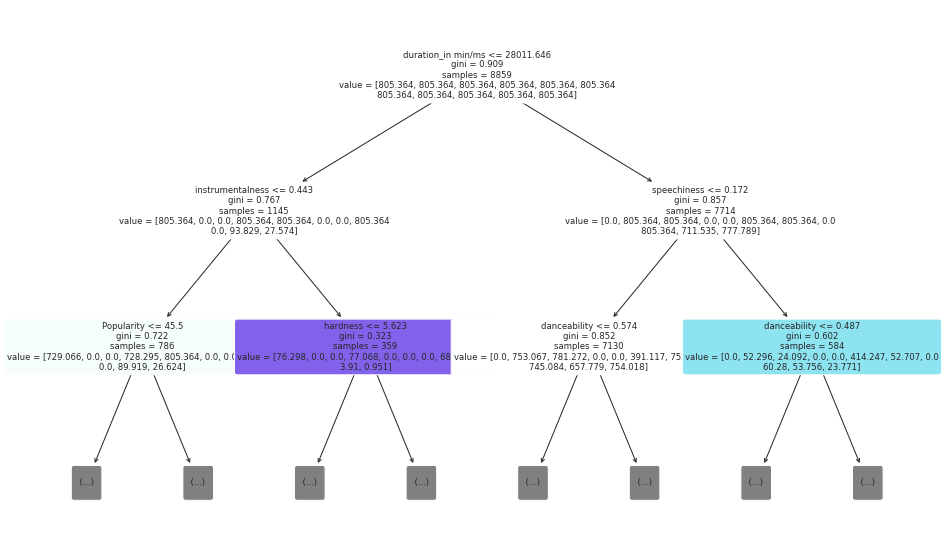

In [445]:
# смотрим на первые 2 уровня разбиений (из 5-и)

from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(best_dt, 
          rounded=True, 
          max_depth=2, 
          filled=True, 
          fontsize=8.5, 
          feature_names=cat_cols + num_cols)
plt.show()
None

#### 2.5 Оцениваем метрики

In [446]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [447]:
print('Матрица неточностей (правильные прогнозы на главной диагонали):')
print(confusion_matrix(y_test, preds))  

# Отчёт о классификации
print('\nОтчёт:')
print(classification_report(y_test, preds))

Матрица неточностей (правильные прогнозы на главной диагонали):
[[ 68   0   0  15  15   0   0   2   0   1   0]
 [  0  34  40   0   0  13  59   0  42  25  54]
 [  0  18 134   0   0  21  20   0  18  15  28]
 [ 16   0   0  37   4   0   0   4   0   0   0]
 [  8   0   0   0  28   0   0   1   0   0   0]
 [  0   3  15   0   0  91   3   0   4  15   3]
 [  0  56  97   0   0  37 122   0  64  28 107]
 [  9   0   0   5   1   0   0  92   0   0   0]
 [  0  21  28   0   0   2  25   0 245   9  44]
 [ 13  13  58   6   9  39  35   0  11  65  26]
 [ 11  93 159   1   5  31  70   0 202  85 176]]

Отчёт:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       101
           1       0.14      0.13      0.13       267
           2       0.25      0.53      0.34       254
           3       0.58      0.61      0.59        61
           4       0.45      0.76      0.57        37
           5       0.39      0.68      0.49       134
           6       0.37      0.

In [448]:
print(f'accuracy = {accuracy_score(y_test, preds):.2f}')

accuracy = 0.37


#### 2.6 Важность параметров в модели

<AxesSubplot:>

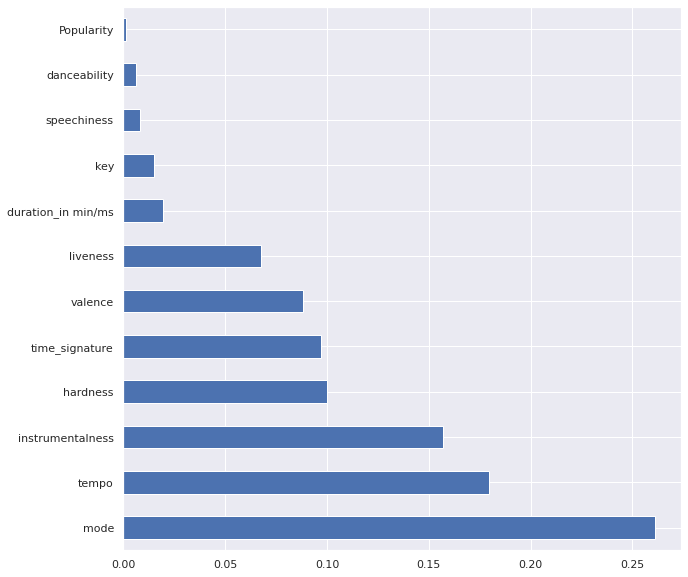

In [449]:
feat_importances = pd.Series(best_dt.feature_importances_, index=data[num_cols+cat_cols].columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**Результат:** итоговые результаты далеки от идеала

$~$

### Задание 3. Другие модели (5 баллов за модель)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

#### 3.0 Cоздаем экземпляры классификаторов

In [374]:
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC

import numpy as np
import xgboost as xgb

In [452]:
RF_model = RandomForestClassifier(class_weight=class_weights)                      # Random Forest
ADA_model = AdaBoostClassifier()                                                   # AdaBoost
GRAD_model = GradientBoostingClassifier()                                          # Gradient Boosting
XGB_model = xgb.XGBClassifier()                                                    # XGBoost
SVC_model = SVC(class_weight=class_weights)                                        # Support Vector Machines
KNN_model = KNeighborsClassifier()                                                 # k Nearest Neighbors
Bayes_model = naive_bayes.GaussianNB()                                             # Naive Bayes

#### 3.1 Лучший k для KNN

In [371]:
# n_neighbors -- число ближайших соседей


error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

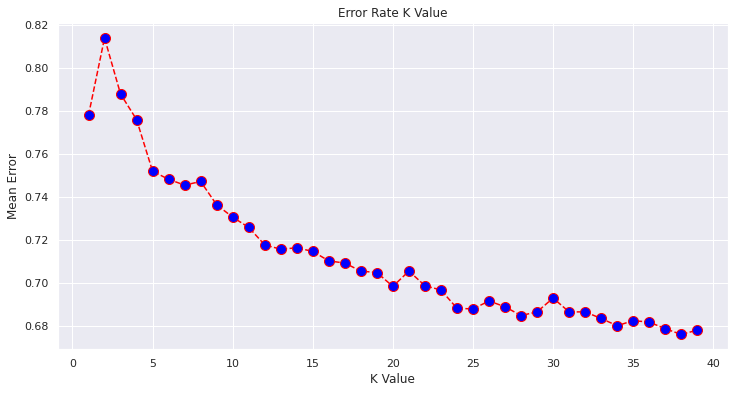

In [372]:
# выводим ошибку на график

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### 3.2 Лучшие параметры для Random Forest

In [454]:
# n_estimators -- количество деревьев
# criterion -- функция для измерения качества сплита
# bootstrap -- использовать весь датасет целиком, или позволить алгоритму делить его на кусочки

grid_param_rf = {
    'n_estimators': [100, 300, 500, 800, 1000],
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [True, False]
}

In [455]:
grid_search_rf = GridSearchCV(estimator=RF_model,
                     param_grid=grid_param_rf,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             n_jobs=-1, param_grid={'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [456]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

{'n_estimators': 1000}
0.46325748547261947
RandomForestClassifier(n_estimators=1000)


#### 3.3 Лучшие параметры для <...>

Место для подбора лучших параметров для других алгоритмов...

#### 3.4 Смотрим на все модели

Самописная интерактивная менюшка, позволяющая выбирать модели из dropdown списка и смотреть результаты работы алгоритма по 5-и фолдам (а также среднее качество работы).

In [405]:
from ipywidgets import interact, RadioButtons, Dropdown, FloatSlider, IntSlider
import time

In [388]:
# 

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [457]:
# Переобозначаем экземпляры классификаторов с учётом выбора "лучших" параметров

DT_model = best_dt                                                                          # Decision Tree
RF_model = grid_search_rf.best_estimator_                                                   # Random Forest
ADA_model = AdaBoostClassifier()                                                            # AdaBoost
GRAD_model = GradientBoostingClassifier()                                                   # Gradient Boosting
XGB_model = xgb.XGBClassifier()                                                             # XGBoost
SVC_model = SVC()                                                                           # Support Vector Machines
KNN_model = KNeighborsClassifier(n_neighbors=2)                                             # k Nearest Neighbors
Bayes_model = naive_bayes.GaussianNB()                                                      # Naive Bayes


all_models = [
    ('Desicion Tree', DT_model),
    ('Random Forest', RF_model),
    ('ADA Boost', ADA_model),
    ('Gradient Boosting', GRAD_model),
    ('XG Boost', XGB_model),
    ('Support Vector Machines', SVC_model),
    ('k Nearest Neighbors', KNN_model),
    ('Naive Bayes', Bayes_model),
]


In [458]:
def model_analysis(model_name):
    classifiers = []                                    # обученные модели для каждого из разбиений
    learn_time = []                                     # время обучения
    predict_time = []                                   # время предсказания (очевидно меньше чем для обучения, но на всякий)
    accuracy = []                                       # точность для каждого разбиения
    
    for ikf, (train_index, test_index) in enumerate(kf.split(data)):
        # Получили разбиение (списки индексов для обучения и теста/валидации)
        X_train, X_test = data.loc[:,cat_cols+num_cols].iloc[train_index], \
                          data.loc[:,cat_cols+num_cols].iloc[test_index]
        y_train, y_test = np.array(data.loc[:, target_col].iloc[train_index]).reshape((len(train_index),)), \
                          np.array(data.loc[:, target_col].iloc[test_index]).reshape((len(test_index),))
            
        start = time.process_time()                      # засекаем время
        model_name.fit(X_train, y_train)                 # обучаем классификатор
        end1 = time.process_time()                       # снимаем время на обучение
        model1_prediction = model_name.predict(X_test)   # предсказываем ответ
        end2 = time.process_time()                       # снимаем время на предсказание ответа

        classifiers.append(model_name)
        
        # оценка времени
        learn_time.append(end1 - start)
        predict_time.append(end2 - end1)
        
        # Оценка точности — простейший вариант оценки работы классификатора
        accuracy.append(accuracy_score(model1_prediction, y_test))

        # Матрица неточностей даёт больше информации
        print('\nРАЗБИЕНИЕ {}:'.format(ikf+1))
        print('Матрица неточностей (правильные прогнозы на главной диагонали):')
        print(confusion_matrix(model1_prediction, y_test))  

        # Отчёт о классификации
        print('\nОтчёт:')
        print(classification_report(model1_prediction, y_test))
        print('-'*30)
        
    # печать основной информации
    print(f'Среднее время на обучение: {np.round(np.mean(learn_time), 3)} ± {np.round(np.std(learn_time), 3)}, сек')
    print(f'Среднее время на предсказание: {np.round(np.mean(predict_time), 3)} ± {np.round(np.std(predict_time), 3)}, сек')
    print(f'Средняя точность (accuracy): {np.round(np.mean(accuracy), 3)} ± {np.round(np.std(accuracy), 3)}')
    
    best_accuracy_index = accuracy.index(max(accuracy))
    print(f'Максимальная точность наблюдалась в разбиении номер {best_accuracy_index+1}')
    
    
# интерактивный выбор моделей
interact(model_analysis,
         model_name=Dropdown(options=all_models));

**Вместо выводов:** на всех рассмотренных мною алгоритмах accuracy колеблется максимум в районе $0.45$

$~$

#### 3.5 Ещё немного $-$ CatBoost

CatBoostClassifier $-$ хороший классификатор от Яндекса на основе градиентного бустинга

In [462]:
# !pip install catboost

In [420]:
from catboost import CatBoostClassifier

In [459]:
catboost_model = CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
catboost_model.fit(X_train, y_train)

0:	learn: 0.6729268	total: 90.1ms	remaining: 1m 30s
1:	learn: 0.6545944	total: 126ms	remaining: 1m 2s
2:	learn: 0.6355492	total: 155ms	remaining: 51.4s
3:	learn: 0.6184195	total: 182ms	remaining: 45.3s
4:	learn: 0.6016991	total: 208ms	remaining: 41.4s
5:	learn: 0.5860114	total: 236ms	remaining: 39.1s
6:	learn: 0.5721577	total: 265ms	remaining: 37.6s
7:	learn: 0.5580237	total: 291ms	remaining: 36.1s
8:	learn: 0.5438947	total: 328ms	remaining: 36.1s
9:	learn: 0.5308628	total: 359ms	remaining: 35.6s
10:	learn: 0.5184997	total: 387ms	remaining: 34.8s
11:	learn: 0.5068168	total: 415ms	remaining: 34.2s
12:	learn: 0.4952189	total: 442ms	remaining: 33.6s
13:	learn: 0.4841690	total: 470ms	remaining: 33.1s
14:	learn: 0.4737808	total: 499ms	remaining: 32.8s
15:	learn: 0.4639720	total: 537ms	remaining: 33s
16:	learn: 0.4543867	total: 566ms	remaining: 32.7s
17:	learn: 0.4453701	total: 595ms	remaining: 32.5s
18:	learn: 0.4365025	total: 626ms	remaining: 32.3s
19:	learn: 0.4282834	total: 663ms	remaini

164:	learn: 0.1740612	total: 5.61s	remaining: 28.4s
165:	learn: 0.1737538	total: 5.65s	remaining: 28.4s
166:	learn: 0.1735365	total: 5.68s	remaining: 28.3s
167:	learn: 0.1733226	total: 5.71s	remaining: 28.3s
168:	learn: 0.1730861	total: 5.77s	remaining: 28.4s
169:	learn: 0.1728525	total: 5.82s	remaining: 28.4s
170:	learn: 0.1724878	total: 5.87s	remaining: 28.5s
171:	learn: 0.1722253	total: 5.9s	remaining: 28.4s
172:	learn: 0.1720486	total: 5.93s	remaining: 28.3s
173:	learn: 0.1717895	total: 5.96s	remaining: 28.3s
174:	learn: 0.1714982	total: 5.99s	remaining: 28.2s
175:	learn: 0.1712251	total: 6.04s	remaining: 28.3s
176:	learn: 0.1709541	total: 6.08s	remaining: 28.3s
177:	learn: 0.1708066	total: 6.15s	remaining: 28.4s
178:	learn: 0.1706132	total: 6.18s	remaining: 28.3s
179:	learn: 0.1703216	total: 6.21s	remaining: 28.3s
180:	learn: 0.1701300	total: 6.23s	remaining: 28.2s
181:	learn: 0.1699177	total: 6.27s	remaining: 28.2s
182:	learn: 0.1696217	total: 6.31s	remaining: 28.2s
183:	learn: 0

326:	learn: 0.1501992	total: 11.4s	remaining: 23.4s
327:	learn: 0.1500728	total: 11.4s	remaining: 23.4s
328:	learn: 0.1499593	total: 11.5s	remaining: 23.4s
329:	learn: 0.1498859	total: 11.5s	remaining: 23.3s
330:	learn: 0.1498005	total: 11.5s	remaining: 23.3s
331:	learn: 0.1497594	total: 11.6s	remaining: 23.2s
332:	learn: 0.1496243	total: 11.6s	remaining: 23.2s
333:	learn: 0.1495039	total: 11.6s	remaining: 23.2s
334:	learn: 0.1494100	total: 11.7s	remaining: 23.2s
335:	learn: 0.1493315	total: 11.7s	remaining: 23.2s
336:	learn: 0.1492255	total: 11.8s	remaining: 23.2s
337:	learn: 0.1491137	total: 11.8s	remaining: 23.2s
338:	learn: 0.1490087	total: 11.9s	remaining: 23.2s
339:	learn: 0.1488979	total: 11.9s	remaining: 23.1s
340:	learn: 0.1488200	total: 11.9s	remaining: 23.1s
341:	learn: 0.1487192	total: 12s	remaining: 23s
342:	learn: 0.1486556	total: 12s	remaining: 23s
343:	learn: 0.1485432	total: 12.1s	remaining: 23s
344:	learn: 0.1484711	total: 12.1s	remaining: 23s
345:	learn: 0.1483879	to

491:	learn: 0.1384783	total: 16.7s	remaining: 17.3s
492:	learn: 0.1384248	total: 16.8s	remaining: 17.2s
493:	learn: 0.1383823	total: 16.8s	remaining: 17.2s
494:	learn: 0.1383352	total: 16.8s	remaining: 17.2s
495:	learn: 0.1382522	total: 16.9s	remaining: 17.1s
496:	learn: 0.1382234	total: 16.9s	remaining: 17.1s
497:	learn: 0.1381587	total: 16.9s	remaining: 17.1s
498:	learn: 0.1381138	total: 17s	remaining: 17.1s
499:	learn: 0.1380387	total: 17s	remaining: 17s
500:	learn: 0.1379819	total: 17.1s	remaining: 17s
501:	learn: 0.1379084	total: 17.1s	remaining: 17s
502:	learn: 0.1378400	total: 17.1s	remaining: 16.9s
503:	learn: 0.1377909	total: 17.2s	remaining: 16.9s
504:	learn: 0.1377107	total: 17.2s	remaining: 16.9s
505:	learn: 0.1376660	total: 17.3s	remaining: 16.9s
506:	learn: 0.1376222	total: 17.3s	remaining: 16.8s
507:	learn: 0.1375735	total: 17.3s	remaining: 16.8s
508:	learn: 0.1375524	total: 17.4s	remaining: 16.7s
509:	learn: 0.1374993	total: 17.4s	remaining: 16.7s
510:	learn: 0.1374266	

653:	learn: 0.1308714	total: 21.9s	remaining: 11.6s
654:	learn: 0.1308297	total: 21.9s	remaining: 11.5s
655:	learn: 0.1307972	total: 21.9s	remaining: 11.5s
656:	learn: 0.1307244	total: 21.9s	remaining: 11.5s
657:	learn: 0.1306882	total: 22s	remaining: 11.4s
658:	learn: 0.1306277	total: 22s	remaining: 11.4s
659:	learn: 0.1305806	total: 22s	remaining: 11.4s
660:	learn: 0.1305300	total: 22.1s	remaining: 11.3s
661:	learn: 0.1304885	total: 22.1s	remaining: 11.3s
662:	learn: 0.1304470	total: 22.1s	remaining: 11.2s
663:	learn: 0.1304074	total: 22.2s	remaining: 11.2s
664:	learn: 0.1303837	total: 22.2s	remaining: 11.2s
665:	learn: 0.1303340	total: 22.2s	remaining: 11.1s
666:	learn: 0.1302942	total: 22.2s	remaining: 11.1s
667:	learn: 0.1302623	total: 22.3s	remaining: 11.1s
668:	learn: 0.1302270	total: 22.3s	remaining: 11s
669:	learn: 0.1301873	total: 22.3s	remaining: 11s
670:	learn: 0.1300976	total: 22.4s	remaining: 11s
671:	learn: 0.1300535	total: 22.4s	remaining: 10.9s
672:	learn: 0.1300098	to

816:	learn: 0.1246603	total: 26.7s	remaining: 5.99s
817:	learn: 0.1246349	total: 26.8s	remaining: 5.95s
818:	learn: 0.1246142	total: 26.8s	remaining: 5.92s
819:	learn: 0.1245617	total: 26.8s	remaining: 5.88s
820:	learn: 0.1245192	total: 26.8s	remaining: 5.85s
821:	learn: 0.1244934	total: 26.9s	remaining: 5.82s
822:	learn: 0.1244445	total: 26.9s	remaining: 5.78s
823:	learn: 0.1244303	total: 26.9s	remaining: 5.75s
824:	learn: 0.1244101	total: 26.9s	remaining: 5.71s
825:	learn: 0.1243661	total: 27s	remaining: 5.68s
826:	learn: 0.1243311	total: 27s	remaining: 5.65s
827:	learn: 0.1243044	total: 27s	remaining: 5.61s
828:	learn: 0.1242757	total: 27.1s	remaining: 5.58s
829:	learn: 0.1242559	total: 27.1s	remaining: 5.55s
830:	learn: 0.1242359	total: 27.1s	remaining: 5.51s
831:	learn: 0.1241798	total: 27.1s	remaining: 5.48s
832:	learn: 0.1241457	total: 27.2s	remaining: 5.45s
833:	learn: 0.1241137	total: 27.2s	remaining: 5.41s
834:	learn: 0.1240598	total: 27.2s	remaining: 5.38s
835:	learn: 0.1240

976:	learn: 0.1195564	total: 31.9s	remaining: 751ms
977:	learn: 0.1195315	total: 32s	remaining: 719ms
978:	learn: 0.1194906	total: 32s	remaining: 686ms
979:	learn: 0.1194619	total: 32s	remaining: 654ms
980:	learn: 0.1194271	total: 32.1s	remaining: 622ms
981:	learn: 0.1193893	total: 32.1s	remaining: 589ms
982:	learn: 0.1193568	total: 32.2s	remaining: 556ms
983:	learn: 0.1193345	total: 32.2s	remaining: 524ms
984:	learn: 0.1192944	total: 32.3s	remaining: 491ms
985:	learn: 0.1192719	total: 32.3s	remaining: 458ms
986:	learn: 0.1192338	total: 32.3s	remaining: 426ms
987:	learn: 0.1192026	total: 32.4s	remaining: 393ms
988:	learn: 0.1191761	total: 32.4s	remaining: 361ms
989:	learn: 0.1191602	total: 32.5s	remaining: 328ms
990:	learn: 0.1191321	total: 32.5s	remaining: 295ms
991:	learn: 0.1191103	total: 32.6s	remaining: 263ms
992:	learn: 0.1190916	total: 32.6s	remaining: 230ms
993:	learn: 0.1190426	total: 32.7s	remaining: 197ms
994:	learn: 0.1190132	total: 32.7s	remaining: 164ms
995:	learn: 0.1189

In [460]:
predictions = catboost_model.predict(X_test)

In [461]:
print('Матрица неточностей (правильные прогнозы на главной диагонали):')
print(confusion_matrix(y_test, predictions))  

# Отчёт о классификации
print('\nОтчёт:')
print(classification_report(y_test, predictions))

print(f'accuracy = {accuracy_score(y_test, predictions):.2f}')

Матрица неточностей (правильные прогнозы на главной диагонали):
[[ 73   0   0  16   8   0   0   3   0   1   0]
 [  0  32  32   0   0  10  67   1  36  34  55]
 [  0  13 157   1   0  11  19   0  11  18  24]
 [ 11   0   0  47   1   0   0   2   0   0   0]
 [ 10   0   0   0  26   0   0   1   0   0   0]
 [  0   4   7   0   0  97   2   0   3  18   3]
 [  4  72  73   0   0  26 144   2  63  61  66]
 [  1   0   0   2   0   0   0 104   0   0   0]
 [  0  20  19   0   0   0  18   0 272   3  42]
 [  8  13  29   5   5  37  22   0   6 126  24]
 [  5  74 143   7   7  25  81   0 197  89 205]]

Отчёт:
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       101
           1       0.14      0.12      0.13       267
           2       0.34      0.62      0.44       254
           3       0.60      0.77      0.68        61
           4       0.55      0.70      0.62        37
           5       0.47      0.72      0.57       134
           6       0.41      0.

**Результат:** увы, но CatBoost также показал не слишком высокий результат. Конечно, это без перебора параметров.

### Задание 4. (3 балла)

Раз уж вы работаете в командах, то у вас есть шанс обсудить любимые фильмы. Напишите сюда 3 фильма, которые хотели бы посмотреть вместе:

1. Голый пистолет $-$ можно смотреть его бесконечное количество раз;

2. Легенда о волках $-$ Томма Мура называют ирландским Миядзаки, и это очередной его мультфильм про Ирландию :)

3. Семь самураев $-$ классику тоже иногда надо смотреть.